In [2]:

import numpy as np                    # Linear Algebra
import pandas as pd                   # Data processing 
import matplotlib.pyplot as plt       # Visualizations
import seaborn as sns                 # Visualizations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix 
import warnings                       # Hide warning messages
warnings.filterwarnings("ignore")
%matplotlib inline      

Basic Idea of how the csv files have been combined :-
First on user_id b/w train and view_log
Second on item_id on result from First and item_data

In [3]:
df  = pd.read_csv("item_data.csv")

In [4]:
df1 = pd.read_csv("view_log.csv")

In [5]:
df2 = pd.read_csv("train.csv")

In [6]:
df.head(10)

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239
5,108843,953,9,9,90,703
6,129807,18118,16,56,188,2537
7,44250,17856,16,56,42,9641
8,49862,2868,7,23,219,842
9,77042,4032,17,55,58,623


In [7]:
df1.head(10)

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296
5,2018-10-15 08:58:00,android,635314,87387,86660
6,2018-10-15 08:58:00,android,482459,348,35370
7,2018-10-15 08:58:00,android,218564,19227,100065
8,2018-10-15 08:58:00,android,947548,30183,86558
9,2018-10-15 08:58:00,android,941129,31754,127900


In [8]:
df2.head(10)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0
5,3416a75f4cea9109507cacd8e2f2aefc,2018-11-15 00:03:00,67352,409,latest,1,0
6,f457c545a9ded88f18ecee47145a72c0,2018-11-15 00:03:00,64356,190,intermediate,0,0
7,72b32a1f754ba1c09b3695e0cb6cde7f,2018-11-15 00:04:00,27329,481,latest,0,0
8,fc490ca45c00b1249bbe3554a4fdf6fb,2018-11-15 00:05:00,83318,386,old,0,0
9,d2ddea18f00665ce8623e36bd4e3c7c5,2018-11-15 00:05:00,70206,190,latest,0,0


In [9]:
criterio = pd.read_csv("train1.csv")

In [11]:
criterio.head(10)

,Unnamed: 0,impression_id,user_id,app_code,os_version,is_4G,is_click,device_type,session_id,item_id,Month,Day,Hour,Weekday,item_price,category_1,category_2,category_3,product_type
0,0,c4ca4238a0b923820dcc509a6f75849b,87862,422,old,0,0,android,190710,43886,10,19,18,4,2350,11,35,20,5622
1,1,621bf66ddb7c962aa0d22ac97d69b793,87862,422,old,0,0,android,190710,43886,10,19,18,4,2350,11,35,20,5622
2,2,ab394288aed46588bdc90bf4b541ec0d,87862,422,old,0,0,android,190710,43886,10,19,18,4,2350,11,35,20,5622
3,3,372d3f309fef061977fb2f7ba36d74d2,85131,207,latest,1,0,android,663666,43886,10,15,13,0,2350,11,35,20,5622
4,4,372d3f309fef061977fb2f7ba36d74d2,85131,207,latest,1,0,android,846052,43886,11,27,11,1,2350,11,35,20,5622
5,5,edff941bff2b709d9aa7200cf131f06b,85131,207,latest,1,0,android,663666,43886,10,15,13,0,2350,11,35,20,5622
6,6,edff941bff2b709d9aa7200cf131f06b,85131,207,latest,1,0,android,846052,43886,11,27,11,1,2350,11,35,20,5622
7,7,a3545bd79d31f9a72d3a78690adf73fc,23019,207,latest,1,0,android,428544,43886,12,5,11,2,2350,11,35,20,5622
8,8,a3545bd79d31f9a72d3a78690adf73fc,23019,207,latest,1,0,android,1007767,43886,12,5,18,2,2350,11,35,20,5622
9,9,d72fbbccd9fe64c3a14f85d225a046f4,23019,207,latest,1,0,android,428544,43886,12,5,11,2,2350,11,35,20,5622


In [13]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [25]:
features_to_encode = ['os_version', 'device_type']
res= criterio
for feature in features_to_encode:
    res = encode_and_bind(res, feature)

Let us One hot encode some features as above 

In [29]:
res.head(10)

res= res.drop(['device_type'],axis = 1)

In [32]:
res = res.drop(['Unnamed: 0'] , axis = 1)

In [35]:
res.head(10)
res.columns

Index(['impression_id', 'user_id', 'app_code', 'is_4G', 'is_click',
       'session_id', 'item_id', 'Month', 'Day', 'Hour', 'Weekday',
       'item_price', 'category_1', 'category_2', 'category_3', 'product_type',
       'os_version_intermediate', 'os_version_latest', 'os_version_old',
       'device_type_android'],
      dtype='object')

In [39]:
categorical_cols=  ['impression_id','user_id','session_id','item_id']

In [46]:
numerical_cols =  [  'app_code', 'is_4G',  'Month', 'Day', 'Hour', 'Weekday',
       'item_price', 'category_1', 'category_2', 'category_3', 'product_type',
       'os_version_intermediate', 'os_version_latest', 'os_version_old',
       'device_type_android']  

In [47]:
res[numerical_cols].describe()


,app_code,is_4G,Month,Day,Hour,Weekday,item_price,category_1,category_2,category_3,product_type,os_version_intermediate,os_version_latest,os_version_old,device_type_android
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0
mean,249.107350,0.282950,11.089200,14.525150,13.501800,2.725000,3833.014600,10.049900,63.790150,215.939550,6540.996850,0.245100,0.531250,0.223650,1.0
std,137.985482,0.450444,0.662922,7.801039,6.500108,2.073593,2431.935513,1.418841,10.992873,101.069433,3141.370338,0.430157,0.499035,0.416701,0.0
min,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,1024.000000,4.000000,35.000000,20.000000,577.000000,0.000000,0.000000,0.000000,1.0
25%,145.000000,0.000000,11.000000,9.000000,9.000000,1.000000,1024.000000,10.000000,63.000000,67.000000,3055.000000,0.000000,0.000000,0.000000,1.0
50%,213.000000,0.000000,11.000000,14.000000,14.000000,2.000000,3961.000000,10.000000,63.000000,295.000000,8411.000000,0.000000,1.000000,0.000000,1.0
75%,385.000000,1.000000,12.000000,21.000000,19.000000,5.000000,6330.000000,11.000000,76.000000,295.000000,9337.000000,0.000000,1.000000,0.000000,1.0
max,522.000000,1.000000,12.000000,31.000000,23.000000,6.000000,14166.000000,13.000000,76.000000,295.000000,9337.000000,1.000000,1.000000,1.000000,1.0


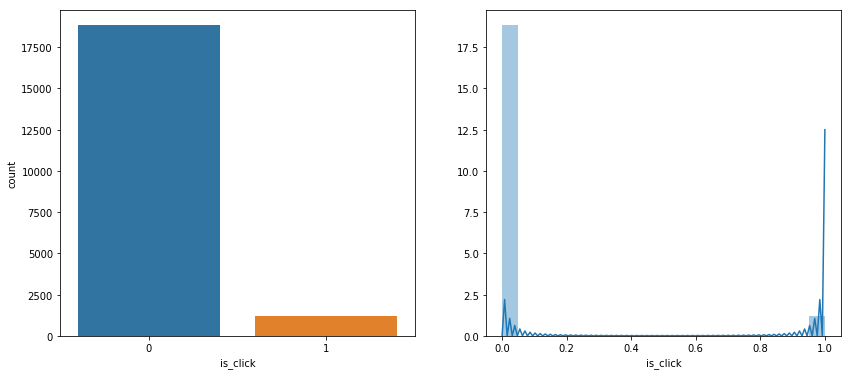

In [49]:
# Visualizing target variable Clicked on Ad
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'is_click', data = res)
plt.subplot(1,2,2)
sns.distplot(res["is_click"], bins = 20)
plt.show()

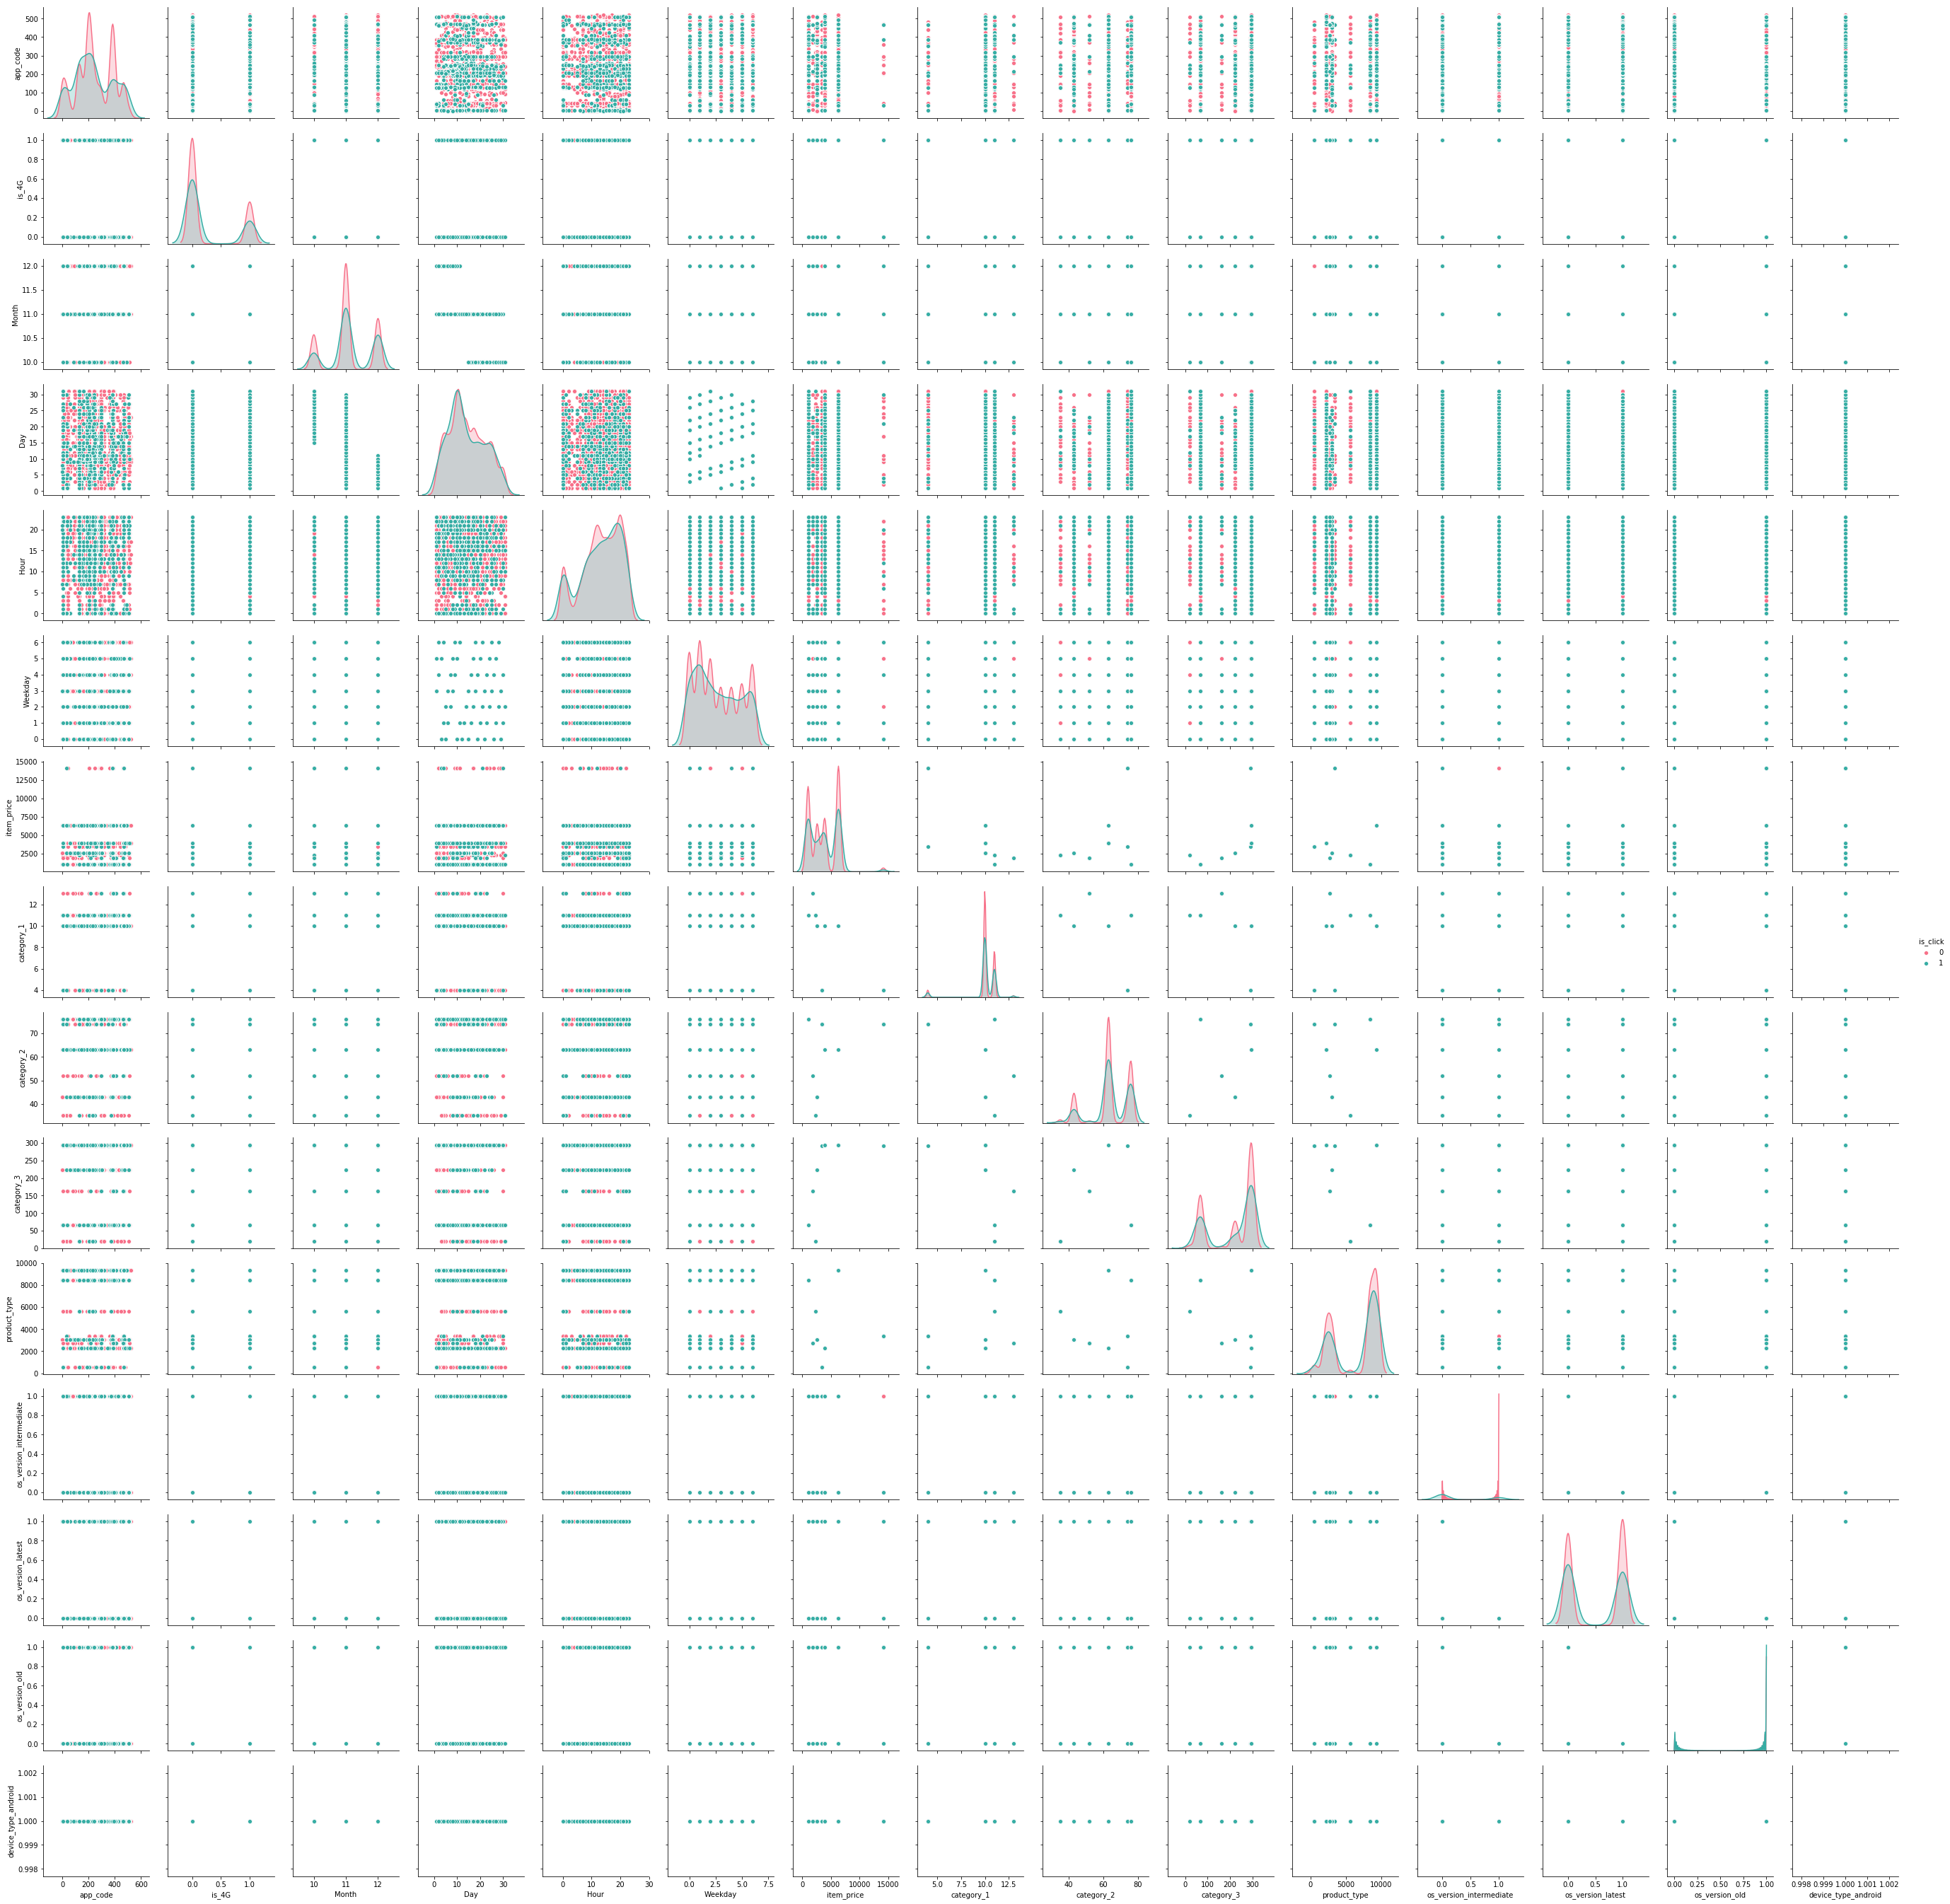

In [54]:
sns.pairplot(res, hue = 'is_click', vars = ['app_code', 'is_4G',  'Month', 'Day', 'Hour', 'Weekday',
       'item_price', 'category_1', 'category_2', 'category_3', 'product_type',
       'os_version_intermediate', 'os_version_latest', 'os_version_old',
       'device_type_android' ], palette = 'husl')



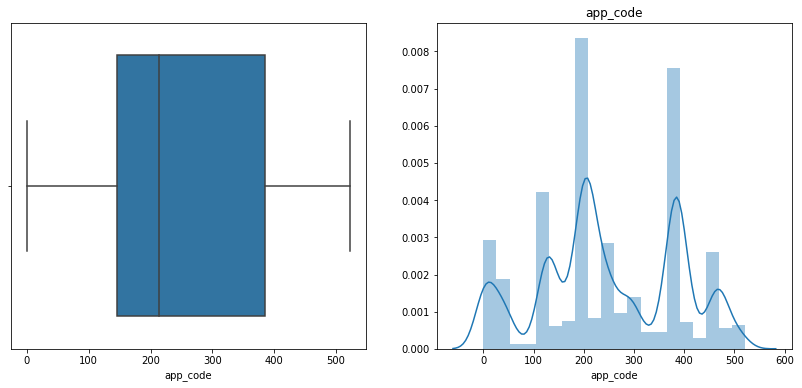

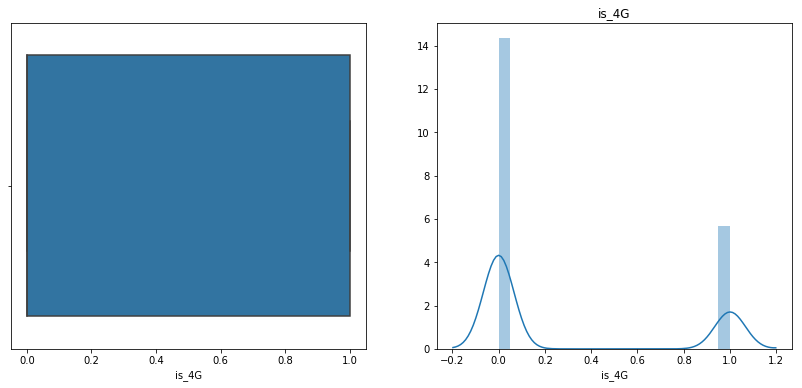

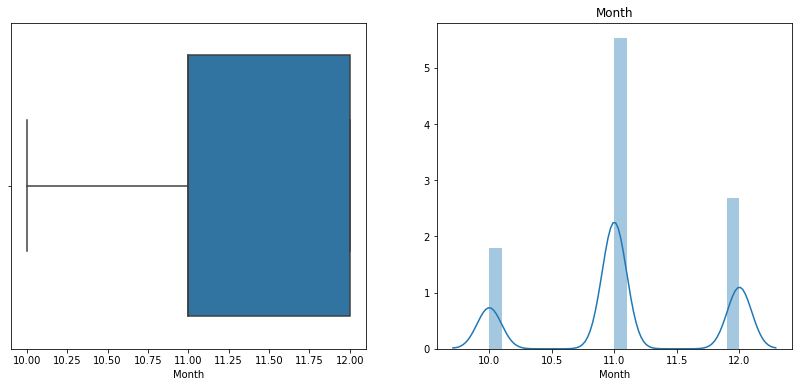

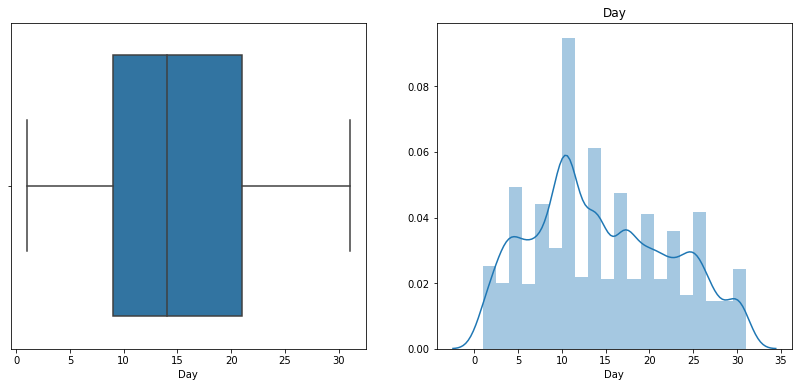

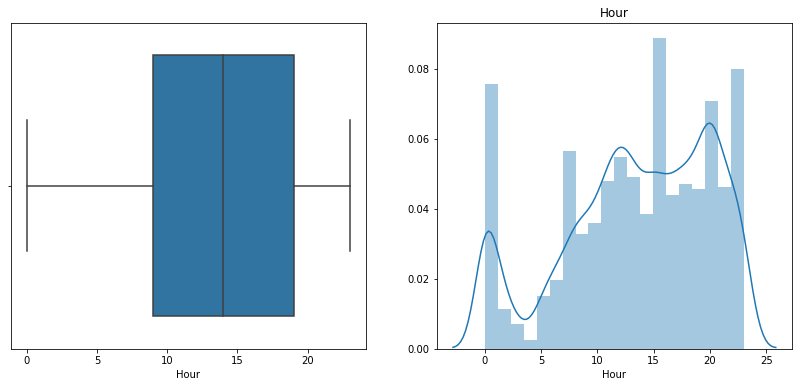

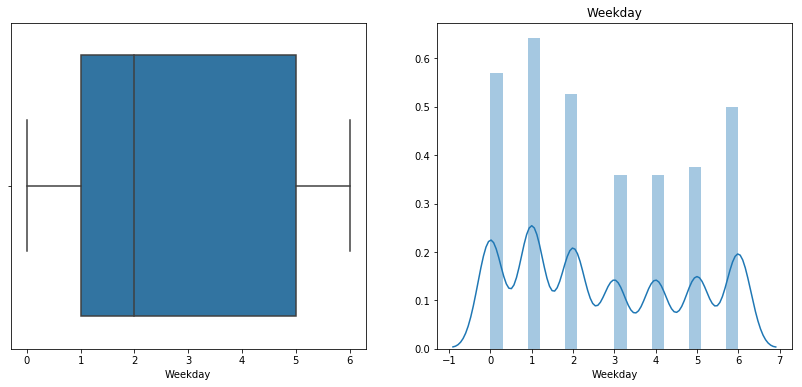

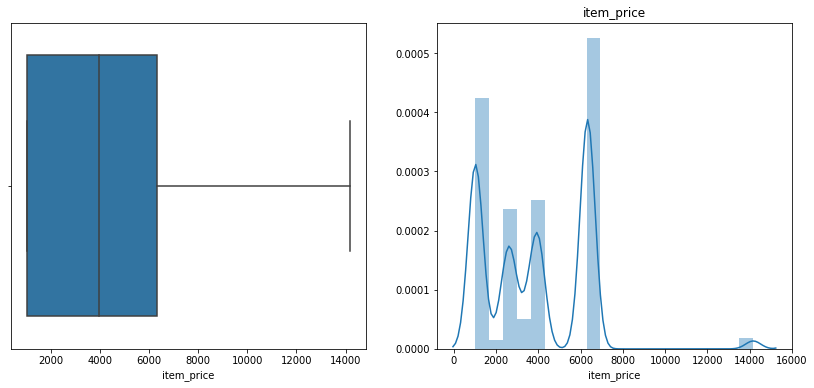

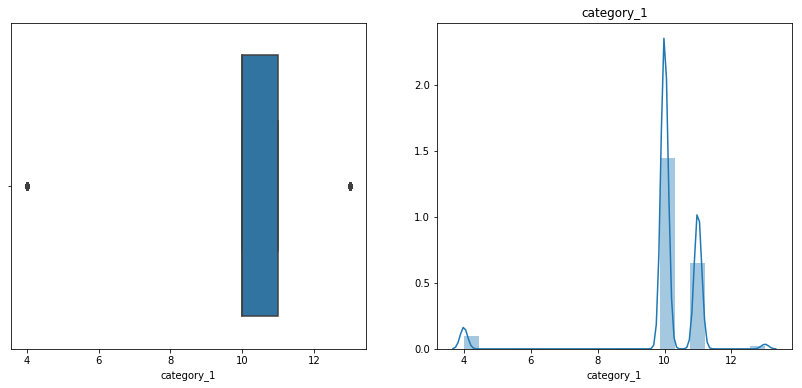

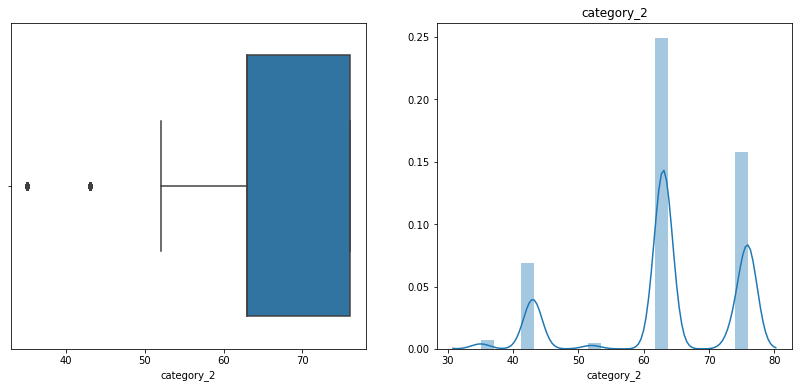

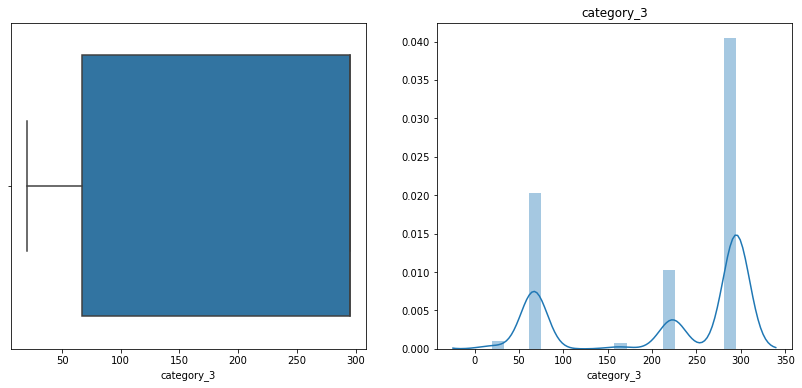

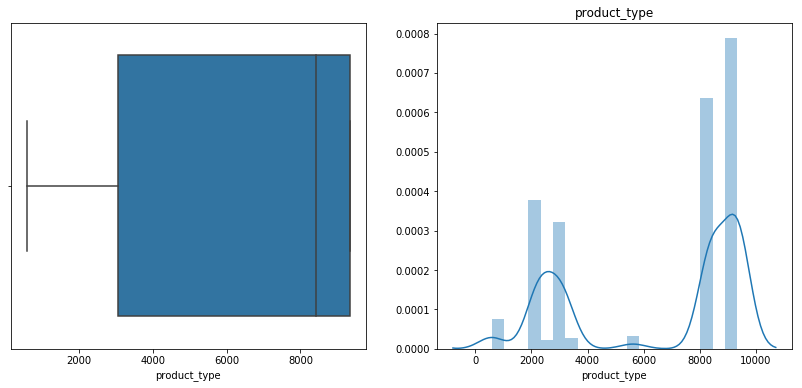

In [61]:
plots =  [ 'app_code', 'is_4G',  'Month', 'Day', 'Hour', 'Weekday',
       'item_price', 'category_1', 'category_2', 'category_3', 'product_type']  
'''
Uni-modal and Bi-modal peaks ke baareme padhna hai of these numerical attributes 
'''

for i in plots:
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(res[i])
    plt.subplot(1,2,2)
    sns.distplot(res[i],bins= 20)    
    plt.title(i)    
    plt.show()

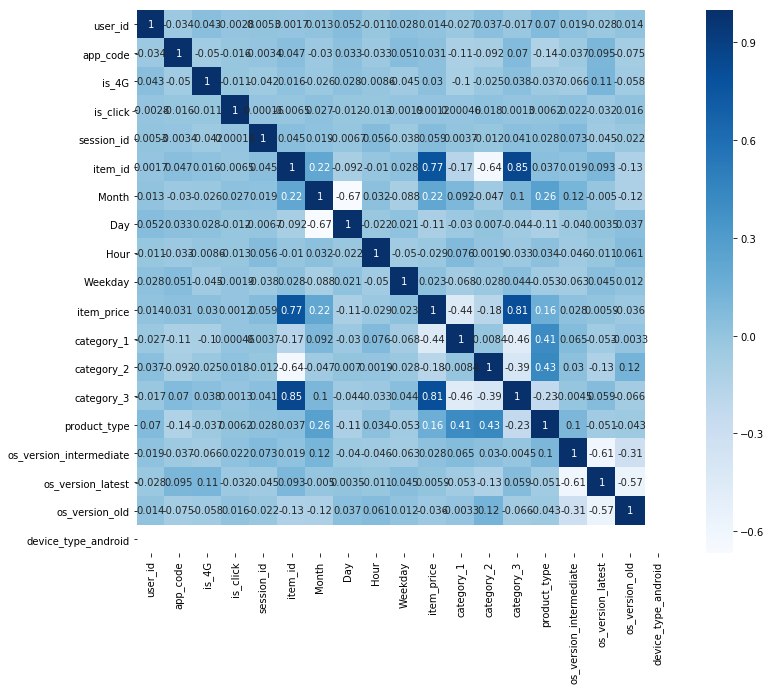

In [62]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(res.corr(), cmap='Blues', annot = True) 

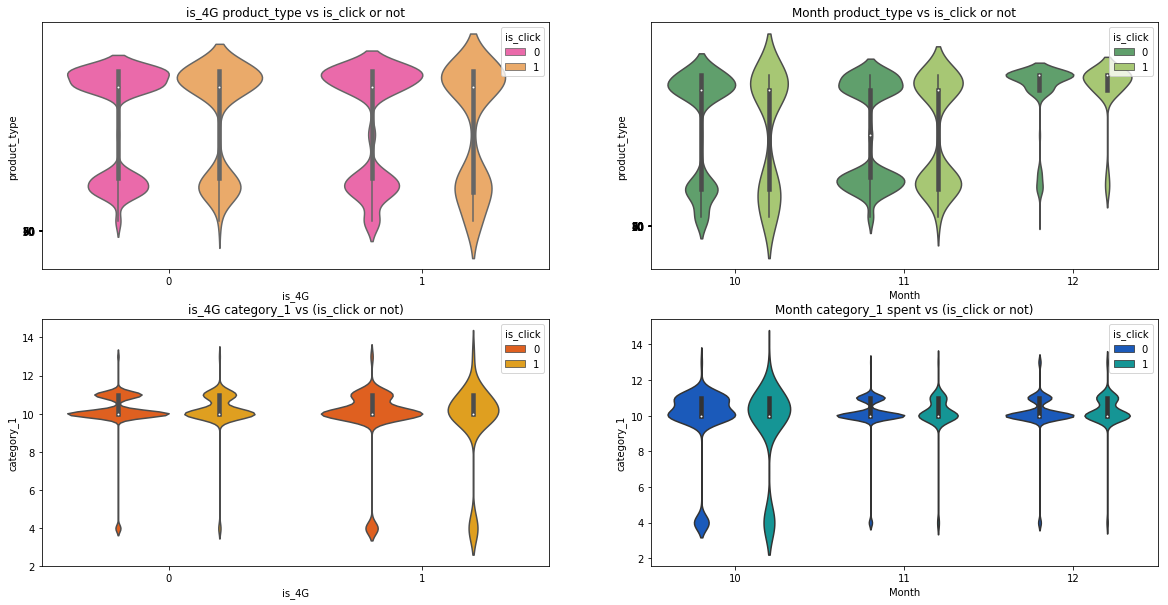

In [69]:
f,ax=plt.subplots(2,2, figsize=(20,10))
sns.violinplot("is_4G","product_type", hue= "is_click", data=res,ax=ax[0,0],palette="spring")
ax[0,0].set_title('is_4G product_type vs is_click or not')
ax[0,0].set_yticks(range(0,80,10))
sns.violinplot("Month","product_type", hue="is_click", data=res,ax=ax[0,1],palette="summer")
ax[0,1].set_title('Month product_type vs is_click or not')
ax[0,1].set_yticks(range(0,90,10))
sns.violinplot("is_4G","category_1", hue="is_click", data=res,ax=ax[1,0],palette="autumn")
ax[1,0].set_title('is_4G category_1 vs (is_click or not)')
sns.violinplot("Month","category_1", hue="is_click", data=res,ax=ax[1,1],palette="winter")
ax[1,1].set_title('Month category_1 spent vs (is_click or not)')
plt.show()

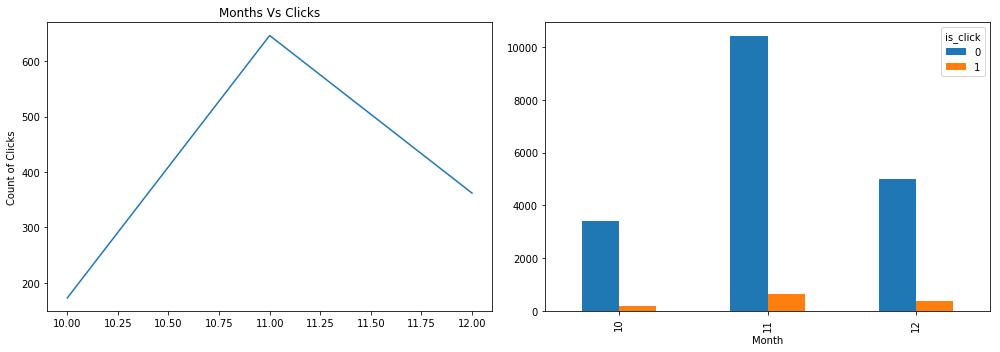

In [70]:
f,ax=plt.subplots(1,2,figsize=(14,5))
res['Month'][res['is_click']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Months Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(res["is_click"], res["Month"]).T.plot(kind = 'Bar',ax=ax[1])
#res.groupby(['Month'])['Clicked on Ad'].sum() # alternative code
plt.tight_layout()
plt.show()

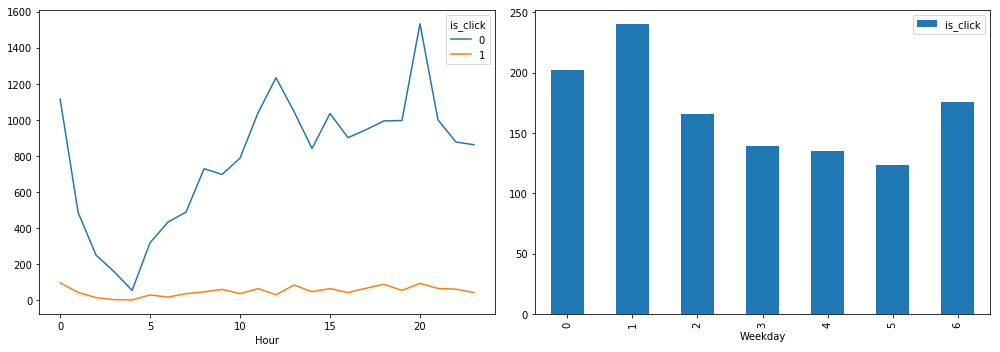

In [71]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(res["is_click"], res["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(res, index = ['Weekday'], values = ['is_click'],aggfunc= np.sum).plot(kind = 'Bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()